<a href="https://colab.research.google.com/github/goktuggokmen/EEM-409-Introduction-to-Machine-Learning-Regression-Assignment/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

# **1. Ev fiyatları verisini (home_data.csv) yükleyin ve inceleyin.**

In [ ]:
data = pd.read_csv("home_data.csv")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  int64  
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
data.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


**a. Posta kodu, ev satış fiyatı gibi özniteliklere göre verinin frekans plot’unu (histogram) çizdirin.**

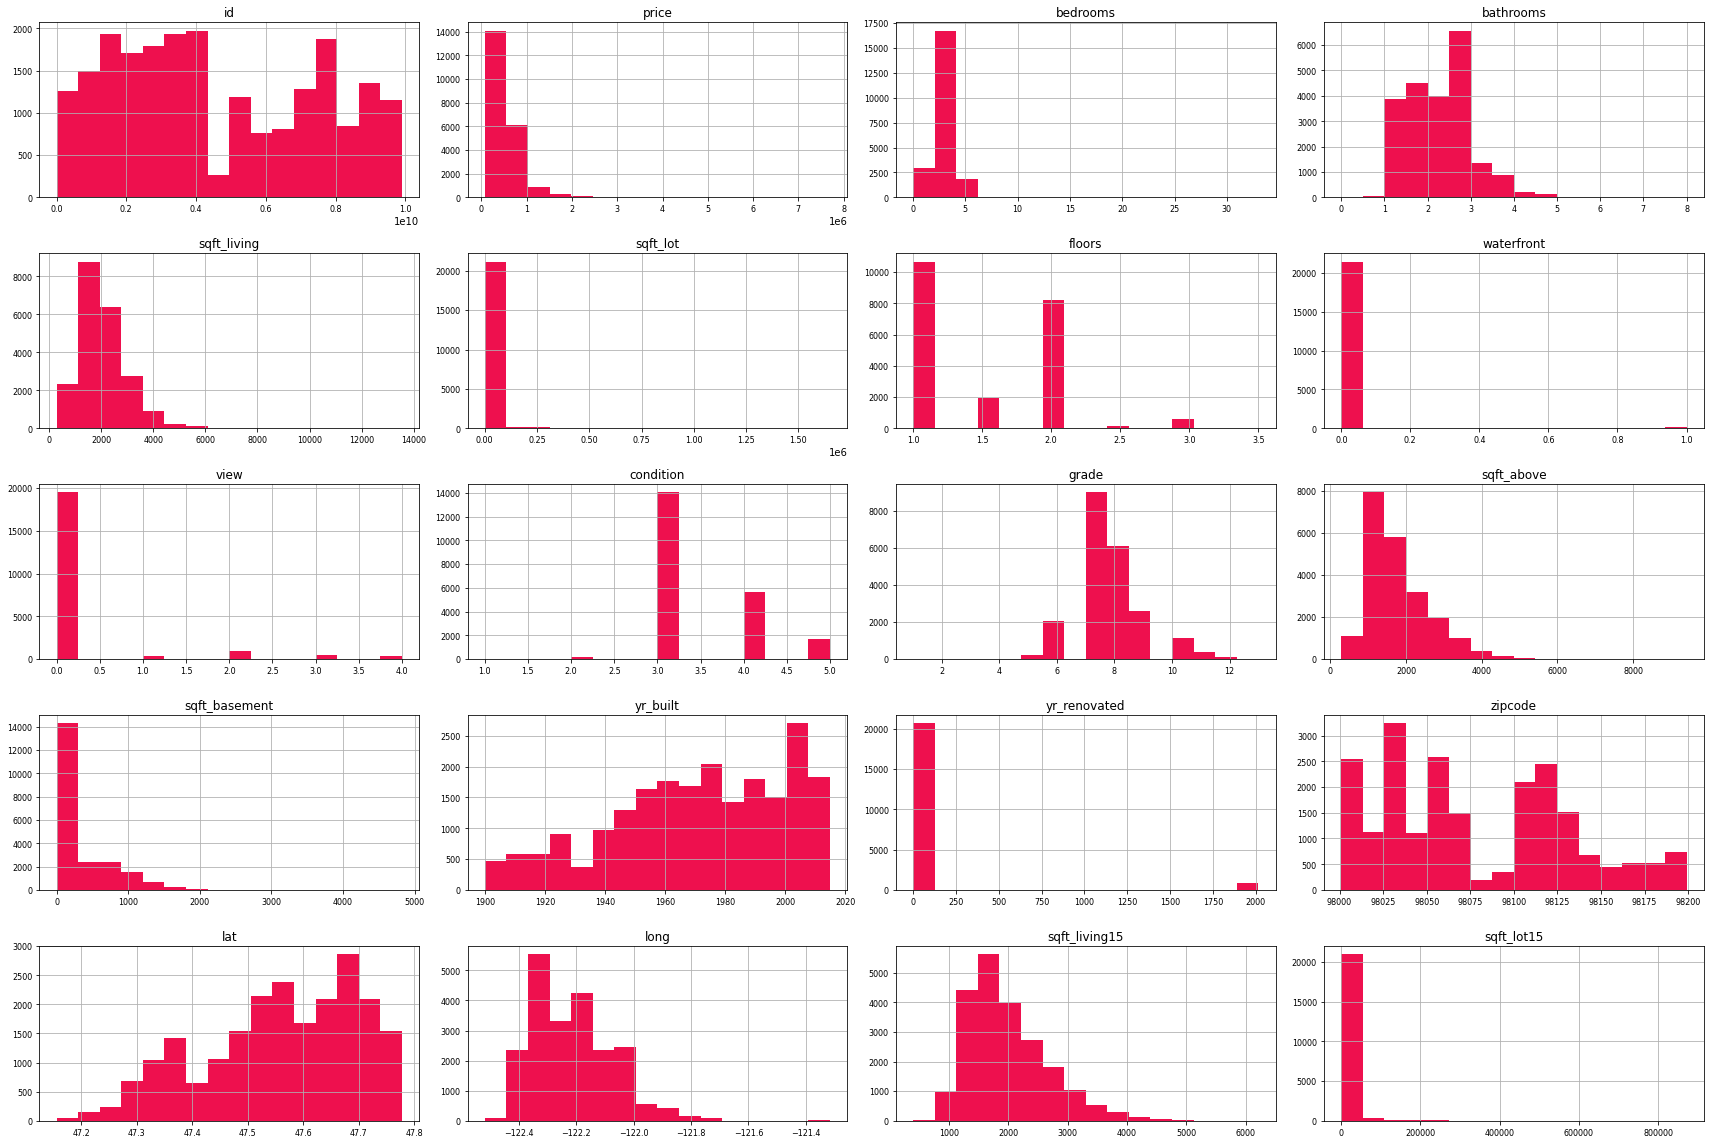

In [ ]:
data.hist(bins = 16,color = '#ee104e',xlabelsize = 8,ylabelsize = 8)
plt.tight_layout(rect=(0,0,4,4))

**b. Verideki en yüksek ve en düşük satış fiyatlı evlerin fiyatları nedir? Ortalama ev satış fiyatı nedir?**

In [ ]:
print("En yüksek fiyatlı evin fiyatı:",data['price'].max())
print("En düşük fiyatlı evin fiyatı:",data['price'].min())
print("Ortalama ev satış fiyatı::",data['price'].mean())

En yüksek fiyatlı evin fiyatı: 7700000
En düşük fiyatlı evin fiyatı: 75000
Ortalama ev satış fiyatı:: 540088.1419053348


**c. En yüksek ortalama satış fiyatına sahip bölgeyi (posta kodu) hesaplayın. Bu posta koduna sahip evlerin ortalama satış fiyatı nedir?**

In [ ]:
zipcode = data['zipcode'].unique()

best_address = 0

for address in zipcode:
  zip_data = data.loc[data['zipcode'] == address]
  zip_ort = zip_data['price'].mean()
  
if zip_ort > best_address:
  best_address = address


zip_data = data.loc[data['zipcode'] == best_address]
best_mean = zip_data['price'].mean()

print("En Yüksek Ortalama Satış Fiyata Sahip Bölge: ", best_address)
print("Bu Posta Koduna Sahip Evlerin Ortalama Satış Fiyatı: ", int(best_mean))

En Yüksek Ortalama Satış Fiyata Sahip Bölge:  98039
Bu Posta Koduna Sahip Evlerin Ortalama Satış Fiyatı:  2160606


# **2. ‘sqft_living’ özniteliğine göre 2000 sqft’ten büyük ve 4000 sqft’ten küçük olan evleri seçin. Tüm evlerin yüzde kaçı bu aralıkta, belirleyin.**

In [ ]:
filtered_houses = data[(data['sqft_living'] > 2000) & (data['sqft_living'] <= 4000)]
filtered_houses

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
10,1736800520,20150403T000000,662500,3,2.50,3560,9796,1.0,0,0,3,8,1860,1700,1965,0,98007,47.6007,-122.145,2210,8925
15,9297300055,20150124T000000,650000,4,3.00,2950,5000,2.0,0,3,3,9,1980,970,1979,0,98126,47.5714,-122.375,2140,4000
21,2524049179,20140826T000000,2000000,3,2.75,3050,44867,1.0,0,4,3,9,2330,720,1968,0,98040,47.5316,-122.233,4110,20336
22,7137970340,20140703T000000,285000,5,2.50,2270,6300,2.0,0,0,3,8,2270,0,1995,0,98092,47.3266,-122.169,2240,7005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21599,7202300110,20140915T000000,810000,4,3.00,3990,7838,2.0,0,0,3,9,3990,0,2003,0,98053,47.6857,-122.046,3370,6814
21603,7852140040,20140825T000000,507250,3,2.50,2270,5536,2.0,0,0,3,8,2270,0,2003,0,98065,47.5389,-121.881,2270,5731
21605,3448900210,20141014T000000,610685,4,2.50,2520,6023,2.0,0,0,3,9,2520,0,2014,0,98056,47.5137,-122.167,2520,6023
21606,7936000429,20150326T000000,1007500,4,3.50,3510,7200,2.0,0,0,3,9,2600,910,2009,0,98136,47.5537,-122.398,2050,6200


In [ ]:
print('Tüm evlerin %', (len(filtered_houses['sqft_living'])/len(data['sqft_living']))*100, 'kadarı 2000 sqft ile 4000 sqft aralığındadır.' )

Tüm evlerin % 42.187572294452416 kadarı 2000 sqft ile 4000 sqft aralığındadır.


# **3.square feet özniteliğinden satış fiyatını tahmin eden basit (lineer) bir regresyon modeli oluşturun.**

In [ ]:
area = data['sqft_living']
price = data['price']
area = (area - area.min()) / (area.max() - area.min())
price = (price - price.min()) / (price.max() - price.min())
x = np.array(area).reshape(-1,1)
y = np.array(price)

# **4. Veriyi %80 ve %20 olacak şekilde eğitim(train) ve test kümelerine rastgele ayırın.**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state = 0)
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

# **5. Basit regresyon modelinizi eğitim kümesinde eğitin ve eğitim iterasyonlarını yazdırın.**

In [ ]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# **6. Eğitilmiş modelinizi inceleyin. Modelinizin katsayılarını yazdırın.**

In [ ]:
print(model.intercept_)
print(model.coef_)
pred = model.predict(X_test)
predictions = pred.reshape(-1,1)

[-0.00536475]
[[0.49345356]]


# **7. Eğitilmiş modelinizin performansını ölçün. RMSE (root mean square error) hatası nedir?**

In [ ]:
print('MSE : ', mean_squared_error(y_test,predictions))
print('RMSE : ', np.sqrt(mean_squared_error(y_test,predictions)))

MSE :  0.001065361564680432
RMSE :  0.03263987690970099


# **8. Şimdi, eğitilmiş modelinizin test kümesi üzerindeki tahminlerini elde edin. (square feet vs. price) olacak şekilde test kümesini ve eğitilmiş modelinize ait regresyon eğrisini çizdirin.**

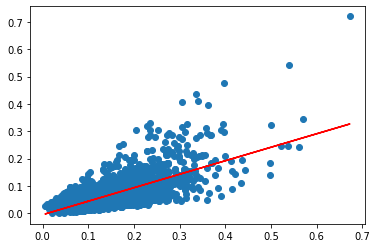

In [ ]:
plt.scatter(X_test, y_test)
plt.plot(X_test, pred, color='red')
plt.show()

# **9. Basit bir lineer regresyon modelini aşağıdaki öznitelikleri (advanced_features) kullanarak oluşturun:**
1 advanced_features=[

2 'bedrooms','bathrooms','sqft_living','sqft_lot','floors','zipcode',

3 'condition', # condition of house

4 'grade', # measure of quality of construction

5 'waterfront', # waterfront property

6 'view', # type of view

7 'sqft_above', # square feet above ground

8 'sqft_basement', # square feet in basement

9 'yr_built', # the year built

10 'yr_renovated', # the year renovated

11 'lat', 'long', # the lat-long of the parcel

12 'sqft_living15', # average sq.ft. of 15 nearest neighbors

13 'sqft_lot15', # average lot size of 15 nearest neighbors

14 ] 

In [ ]:
advanced_features = data[[
'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode',
'condition', # condition of house				
'grade', # measure of quality of construction				
'waterfront', # waterfront property				
'view', # type of view				
'sqft_above', # square feet above ground				
'sqft_basement', # square feet in basement				
'yr_built', # the year built				
'yr_renovated', # the year renovated				
'lat', 'long', # the lat-long of the parcel				
'sqft_living15', # average sq.ft. of 15 nearest neighbors 				
'sqft_lot15', # average lot size of 15 nearest neighbors 
]]

In [ ]:
advanced_features = (advanced_features - advanced_features.min()) / (advanced_features.max() - advanced_features.min())

In [ ]:
print(advanced_features)

       bedrooms  bathrooms  sqft_living  ...     long  sqft_living15  sqft_lot15
0             3       1.00         1180  ... -122.257           1340        5650
1             3       2.25         2570  ... -122.319           1690        7639
2             2       1.00          770  ... -122.233           2720        8062
3             4       3.00         1960  ... -122.393           1360        5000
4             3       2.00         1680  ... -122.045           1800        7503
...         ...        ...          ...  ...      ...            ...         ...
21608         3       2.50         1530  ... -122.346           1530        1509
21609         4       2.50         2310  ... -122.362           1830        7200
21610         2       0.75         1020  ... -122.299           1020        2007
21611         3       2.50         1600  ... -122.069           1410        1287
21612         2       0.75         1020  ... -122.299           1020        1357

[21613 rows x 18 columns]


In [ ]:
x_n = np.array(advanced_features)
y_n = np.array(price) 

In [ ]:
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(x_n,y_n,test_size=0.2,random_state = 0)
y_train_n = y_train_n.reshape(-1,1)
y_test_n = y_test_n.reshape(-1,1)

In [ ]:
model_n = LinearRegression()
model_n.fit(X_train_n,y_train_n)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print(model_n.intercept_)
print(model_n.coef_)
pred_n = model_n.predict(X_test_n)
predictions_n = pred_n.reshape(-1,1)

[0.53654204]
[[-4.54744697e-03  5.17127879e-03  1.47685692e-05  2.30673753e-08
   9.73713895e-04 -7.44221383e-05  3.43206798e-03  1.22741181e-02
   7.94230202e-02  6.91631335e-03  9.54591345e-06  5.22265574e-06
  -3.41919604e-04  2.63676115e-06  7.93266834e-02 -2.91661677e-02
   3.17814889e-06 -6.13049274e-08]]


In [ ]:
print('MSE : ', mean_squared_error(y_test_n,predictions_n))
print('RMSE : ', np.sqrt(mean_squared_error(y_test_n,predictions_n)))

MSE :  0.0006240061377778477
RMSE :  0.024980114847170894


# **10. Yukarıda lineer regresyon (derece=1) modeli kullandık. Onun yerine, daha yüksek dereceli polinom regresyon modeli de kullanabilirdik.**
# **Şimdi, biri 2.derece diğeri 5.derece olmak üzere iki farklı polinom regresyon modeli eğitin. Bu modellerin test kümesi üzerindeki performanslarını ‘sqft_living’ ve advanced_features özniteliklerini kullanarak RMSE cinsinden hesaplayın.**

In [ ]:
x_n2 = np.array(advanced_features)
y_n2 = np.array(price) 
x_n5 = np.array(advanced_features)
y_n5 = np.array(price) 

In [ ]:
X_train_n2, X_test_n2, y_train_n2, y_test_n2 = train_test_split(x_n2,y_n2,test_size=0.2,random_state = 0)
y_train_n2 = y_train_n2.reshape(-1,1)
y_test_n2 = y_test_n2.reshape(-1,1)
X_train_n5, X_test_n5, y_train_n5, y_test_n5 = train_test_split(x_n5,y_n5,test_size=0.2,random_state = 0)
y_train_n5 = y_train_n5.reshape(-1,1)
y_test_n5 = y_test_n5.reshape(-1,1)

In [ ]:
lin_reg2=LinearRegression()
lin_reg2.fit(X_train_n2,y_train_n2)
lin_reg5=LinearRegression()
lin_reg5.fit(X_train_n5,y_train_n5)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
poly_reg2=PolynomialFeatures(degree=2)
X_poly2=poly_reg2.fit_transform(X_train_n2)
poly_reg2.fit(X_poly2,y_train_n2)
lin_reg2=LinearRegression()
lin_reg2.fit(X_poly2,y_train_n2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
poly_reg5=PolynomialFeatures(degree=5)
X_poly5=poly_reg5.fit_transform(X_train_n5)
poly_reg5.fit(X_poly5,y_train_n5)
lin_reg5=LinearRegression()
lin_reg5.fit(X_poly5,y_train_n5)

In [ ]:
pred_n2 = lin_reg2.predict(X_poly2)
predictions_n2 = pred_n2.reshape(-1,1)
print('MSE : ', mean_squared_error(y_train_n2,predictions_n2))
print('RMSE : ', np.sqrt(mean_squared_error(y_train_n2,predictions_n2)))

MSE :  0.00039800999339864156
RMSE :  0.019950187803593266


In [ ]:
pred_n5 = lin_reg5.predict(X_poly5)
predictions_n5 = pred_n5.reshape(-1,1)
print('MSE : ', mean_squared_error(y_train_n5,predictions_n5))
print('RMSE : ', np.sqrt(mean_squared_error(y_train_n5,predictions_n5)))

# **11. Test kümesini (square feet vs. price) olacak şekilde çizdirin ve eğitilmiş modellerinizin regresyon eğrilerini çizdirin.**

In [ ]:
plt.scatter(X_test_n2,y_test_n2,color='red')
plt.plot(X_test_n2,lin_reg2.predict(X_test_n2['sqft_living']),color='blue')
plt.title('Truth or bluff(Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

In [ ]:
plt.scatter(X_test_n5,y_test_n5,color='red')
plt.plot(X_test_n5,lin_reg5.predict(X_test_n5['sqft_living']),color='blue')
plt.title('Truth or bluff(Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

# **12. Eğitilmiş modellerinizi kullanarak ID numaraları '5309101200' ve '1925069082' olan evlerin satış fiyatlarını tahmin edin. Bu evleri inceleyin: Evin alanı ne kadar, kaç odası var, vs? Bu evler için modellerinizin tahmini ne çıktı? Gerçek satış rakamı ile tahmin edilen rakam arasındaki fark ne kadar? Hangi modeli kullanmayı tercih ederdiniz? Neden?**

In [ ]:
ev = data.loc[data['id'] == 6414100192]

ev = ev[[
'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode',
'condition', 		
'grade', 		
'waterfront', 			
'view', 	
'sqft_above', 	
'sqft_basement', 	
'yr_built', 			
'yr_renovated',
'lat', 'long', 	
'sqft_living15', 				
'sqft_lot15', 
]]

print("1.Evin Fiyatı =", data.loc[data['id'] == 6414100192]['price'].values)
print("1.Modelin Tahmini =", str(model.predict(ev[['sqft_living']].values)))
print("2.Modelin Tahmini =", model_n.predict(ev))

1.Evin Fiyatı = [538000]
1.Modelin Tahmini = [[1268.17028113]]
2.Modelin Tahmini = [[0.08714371]]
